# Дипломный проект по курсу PYDA-7 

# Python для анализа данных

* Статистика в Python 

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

# 1. Загрузить файл hr.csv.

In [2]:
hr = pd.read_csv('hr.csv')

* satisfaction_level (0-1)    
* last_evaluation (время, прошедшее с момента последней оценки в годах)
* number_project (количество выполненных проектов)
* average_monthly_hours (среднее количество рабочих часов за месяц)
* time_spend_company (время работы в компании в годах)
* Work_accident (у сотрудника был несчастный случай на рабочем месте)
* left (работник уволился (1 или 0))
* promotion_last_5years (было ли у сотрудника повышение за последние 5 лет)
* sales (отдел, в котором работает сотрудник)
* salary (уровень заработной платы)

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
671,0.11,0.94,6,264,4,0,1,0,IT,low
14802,0.66,0.67,2,255,3,0,1,0,technical,low
4462,0.65,0.86,4,269,2,1,0,0,hr,medium
1864,0.37,0.50,2,154,3,0,1,0,hr,medium
979,0.11,0.95,6,271,4,0,1,0,IT,low
1465,0.45,0.47,2,146,3,0,1,0,sales,medium
6396,0.64,0.50,4,189,3,0,0,0,IT,medium
11118,0.49,1.00,2,125,4,1,0,0,sales,low
9124,0.28,0.46,5,277,6,0,0,0,technical,medium
11167,0.55,0.96,3,194,3,0,0,0,product_mng,medium


In [7]:
len(hr.index)

14999

In [8]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

В наших данных нет пропущенных значений:

In [11]:
 hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [26]:
import statistics

In [12]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


mean - среднее;
min - минимальное;
max - максимальное;
std - среднее отклонение;
50% - медиана.

In [24]:
 hr.shape

(14999, 10)

ВЫШЕУКАЗАННАЯ ТАБЛИЦА ПРЕДСТАВИЛА МНОГО ПАРАМЕТРОВ НУЖНО УКАЗАТЬ ЕЩЁ МОДУ И МЕДИАНУ. Хотя медиану посчитаем повторно, другим методом. Фактически медиана это 50% квантиль.

[Как найти числовые столбцы в Pandas?](https://fooobar.com/questions/133797/how-do-i-find-numeric-columns-in-pandas)

(Метод статистический сам определит, какие среди столбцов числовые, но всё-таки, поможем)

In [25]:
 hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

И методом, что придумал, когда выполнял лабораторную по статистики, выделяя числовые столбцы предварительно.

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = hr.select_dtypes(include=numerics)

In [30]:
newdf.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
10792,0.61,0.42,3,104,2,0,0,0
8844,0.22,0.80,4,149,5,0,0,0
14062,0.20,0.78,4,196,3,0,0,0
8526,0.89,0.58,3,272,2,0,0,0
14296,0.11,0.87,6,305,4,0,1,0


In [33]:
headers = list(newdf.columns.values)

In [34]:
#Подсчёт моды
def mode(header):
    try:
        print('Значение моды: ', statistics.mode(newdf[header]))
    except:
        print('Метод statistics не сработал!')

In [35]:
for header in headers:
    print (header)
    #aim = str(header)
    print('Медиана: ', statistics.median(newdf[header]))
    #print('Значение моды: ', statistics.mode(newdf[header]))
    mode(header)
    print('------------------------------')

satisfaction_level
Медиана:  0.64
Значение моды:  0.1
------------------------------
last_evaluation
Медиана:  0.72
Значение моды:  0.55
------------------------------
number_project
Медиана:  4
Значение моды:  4
------------------------------
average_montly_hours
Медиана:  200
Метод statistics не сработал!
------------------------------
time_spend_company
Медиана:  3
Значение моды:  3
------------------------------
Work_accident
Медиана:  0
Значение моды:  0
------------------------------
left
Медиана:  0
Значение моды:  0
------------------------------
promotion_last_5years
Медиана:  0
Значение моды:  0
------------------------------


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

**Расчёт:**

In [21]:
corr_m = hr.corr().round(2)
corr_m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


**Визуализация:**

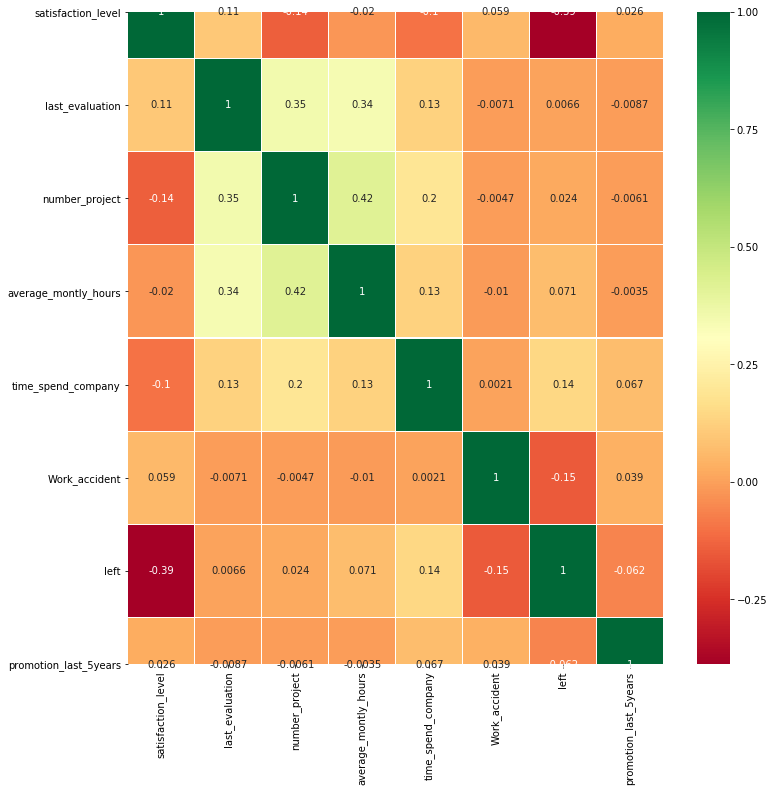

In [17]:
import seaborn as sns
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

# 4. Визуализировать несколько взаимосвязей между переменными.

In [24]:
hr.groupby('sales').mean() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [25]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [40]:
hr.groupby('salary').mean().reset_index()

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
1,low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
2,medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


# Визуализируем данные

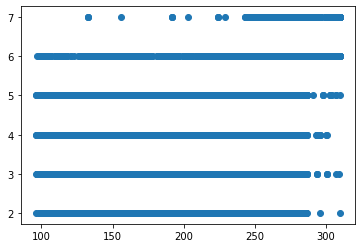

In [13]:
plt.scatter(hr.average_montly_hours, hr.number_project)
plt.show()

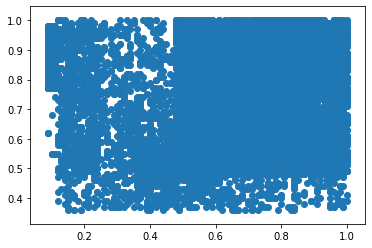

In [14]:
plt.scatter(hr.satisfaction_level, hr.last_evaluation)
plt.show()

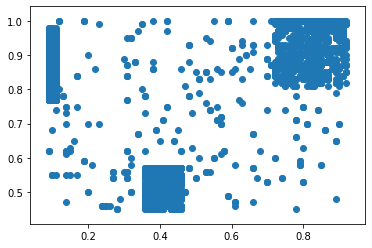

In [16]:
plt.scatter(hr[hr.left==1].satisfaction_level, hr[hr.left==1].last_evaluation)
plt.show()

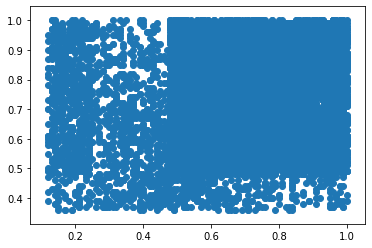

In [17]:
plt.scatter(hr[hr.left==0].satisfaction_level, hr[hr.left==0].last_evaluation)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


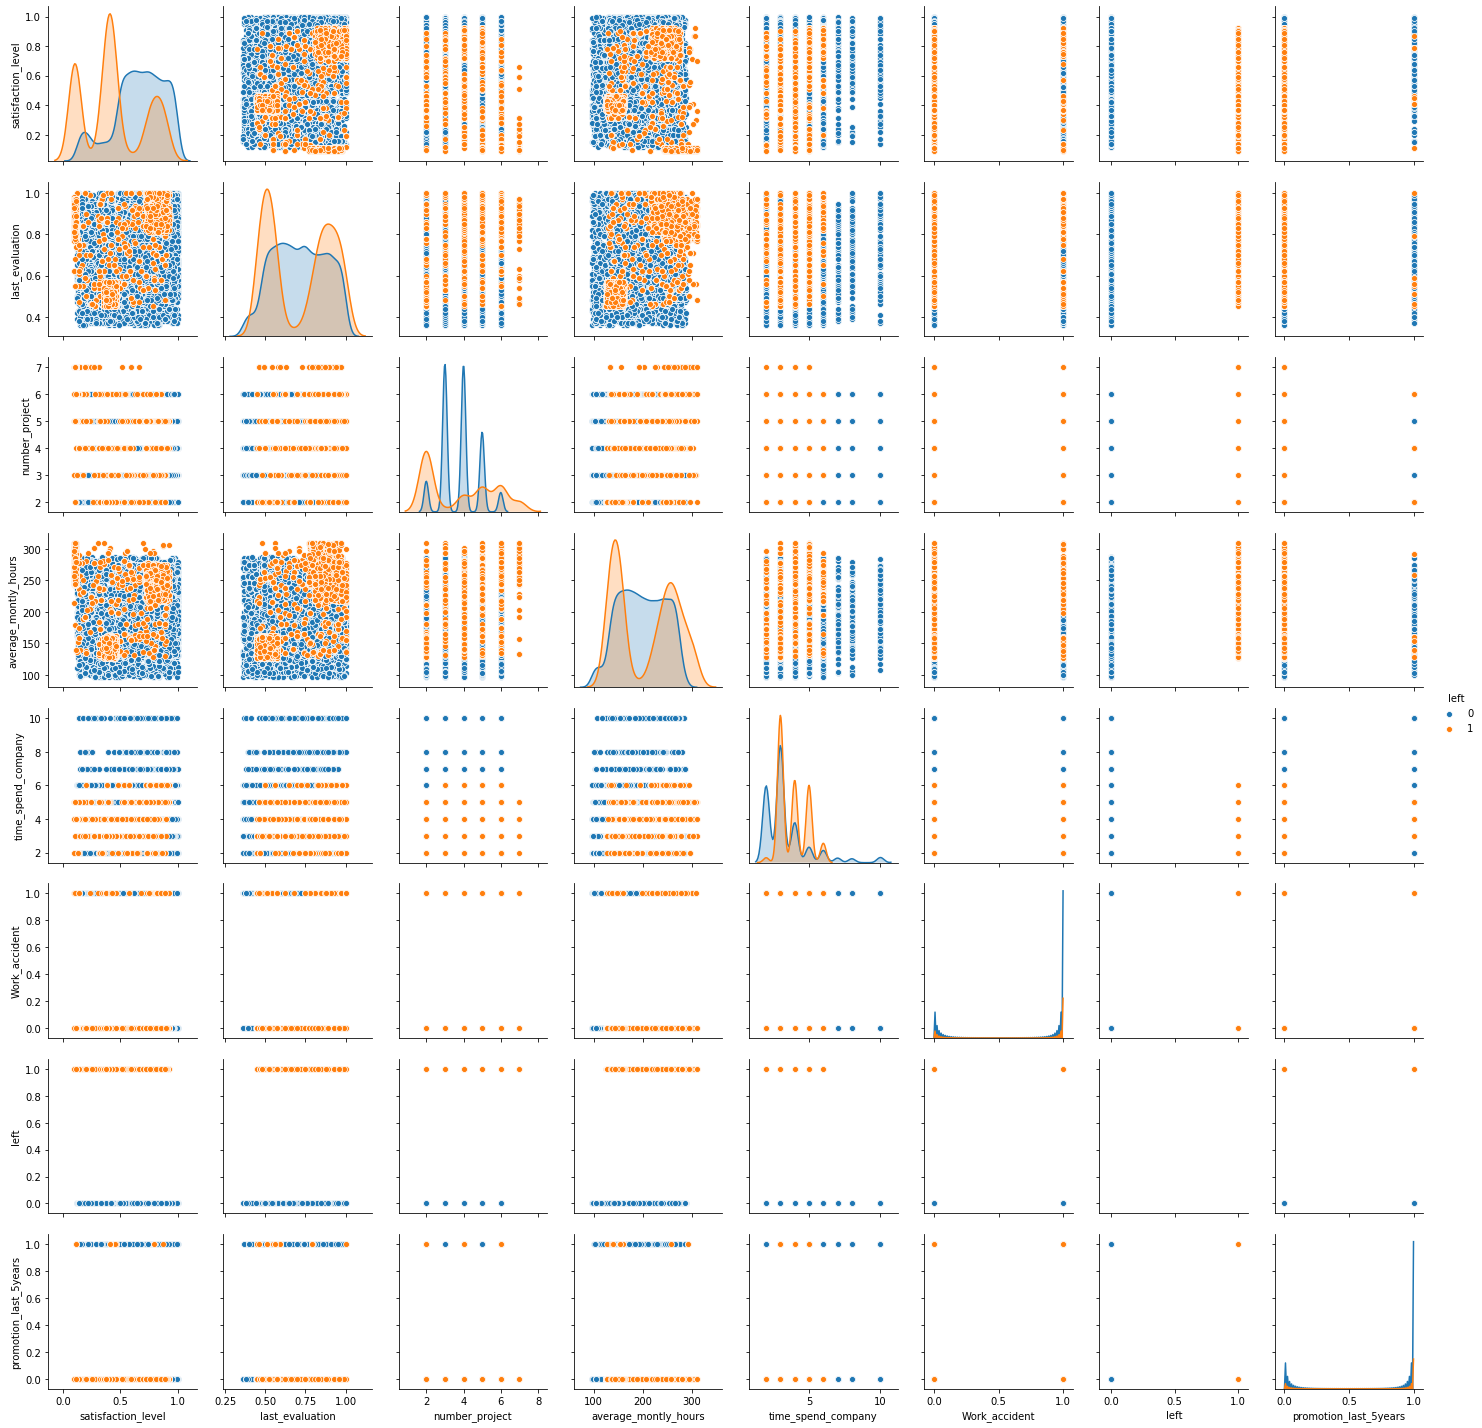

In [5]:
fig = sns.pairplot(data=hr, hue='left')
plt.show()

<Figure size 800x640 with 0 Axes>

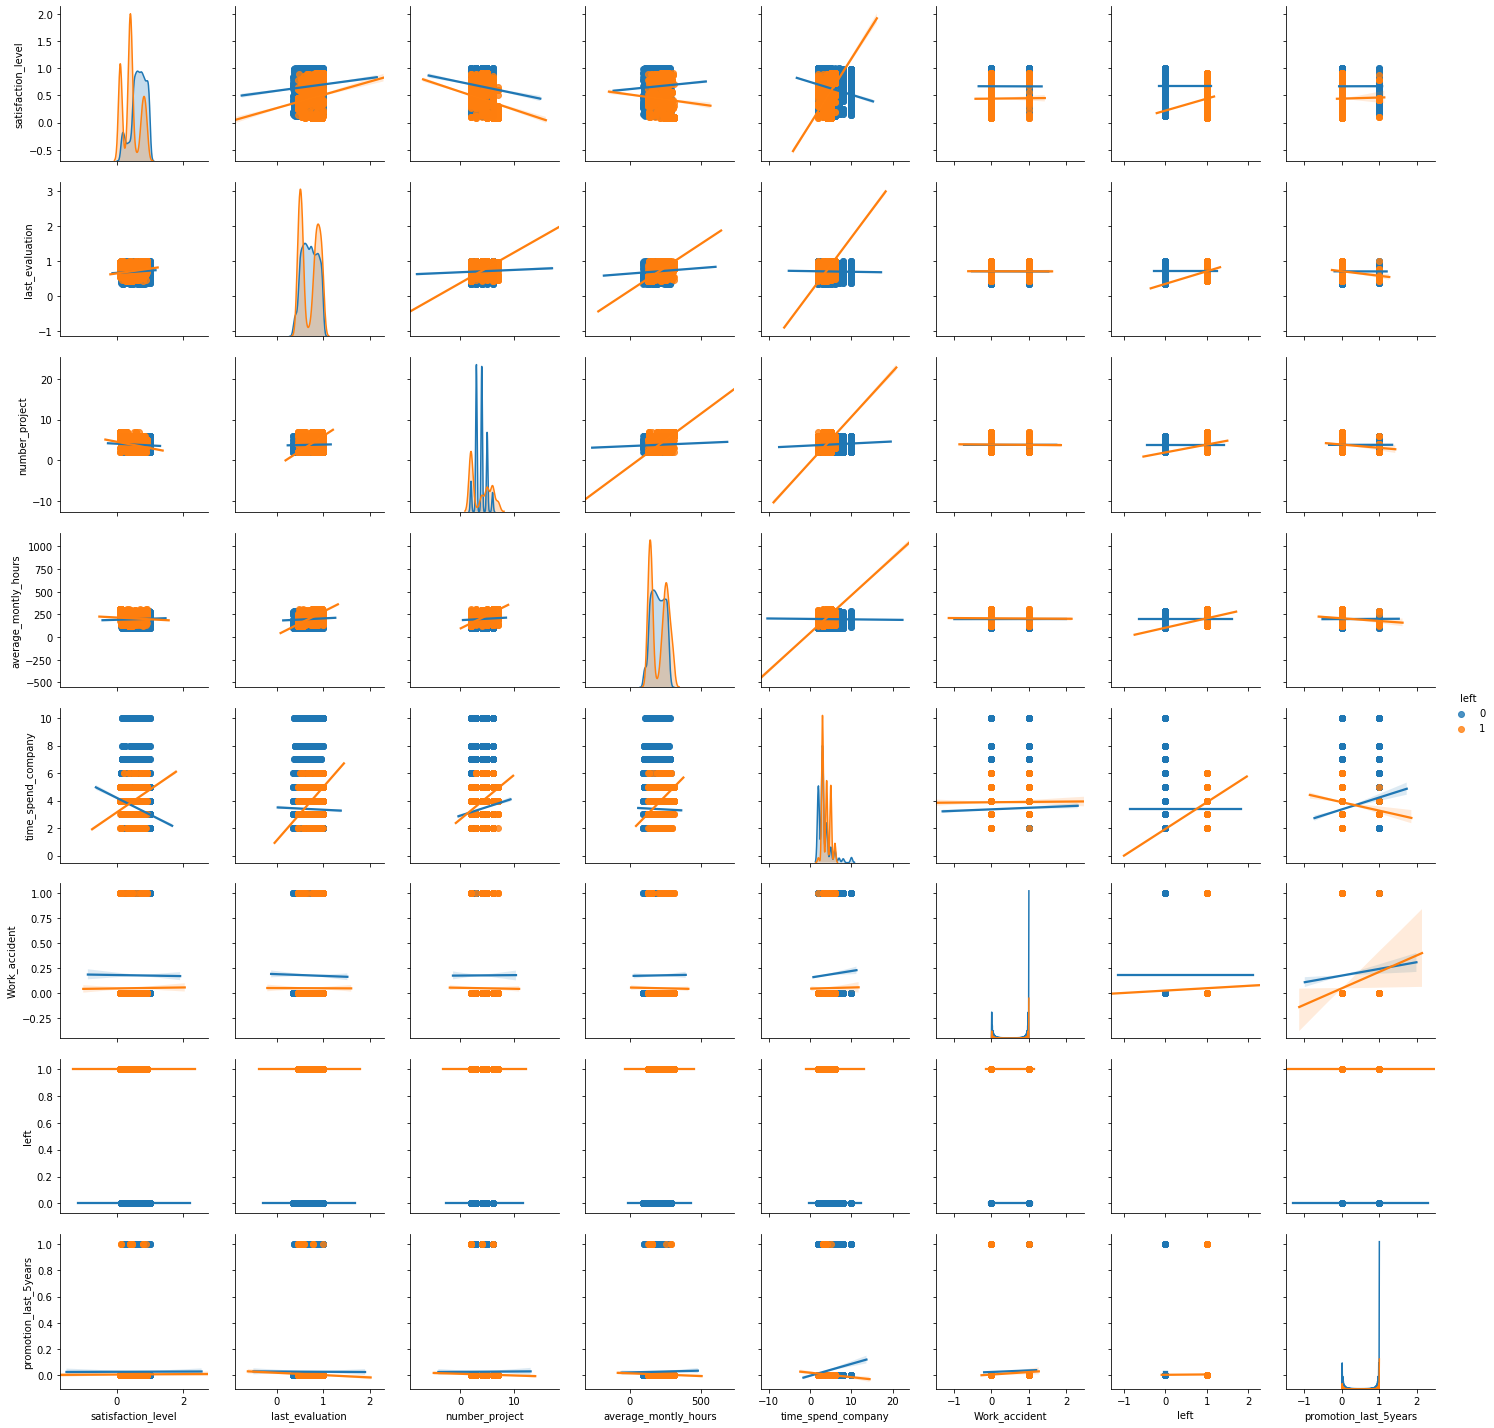

In [6]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(hr, kind="reg", hue="left")
plt.show()

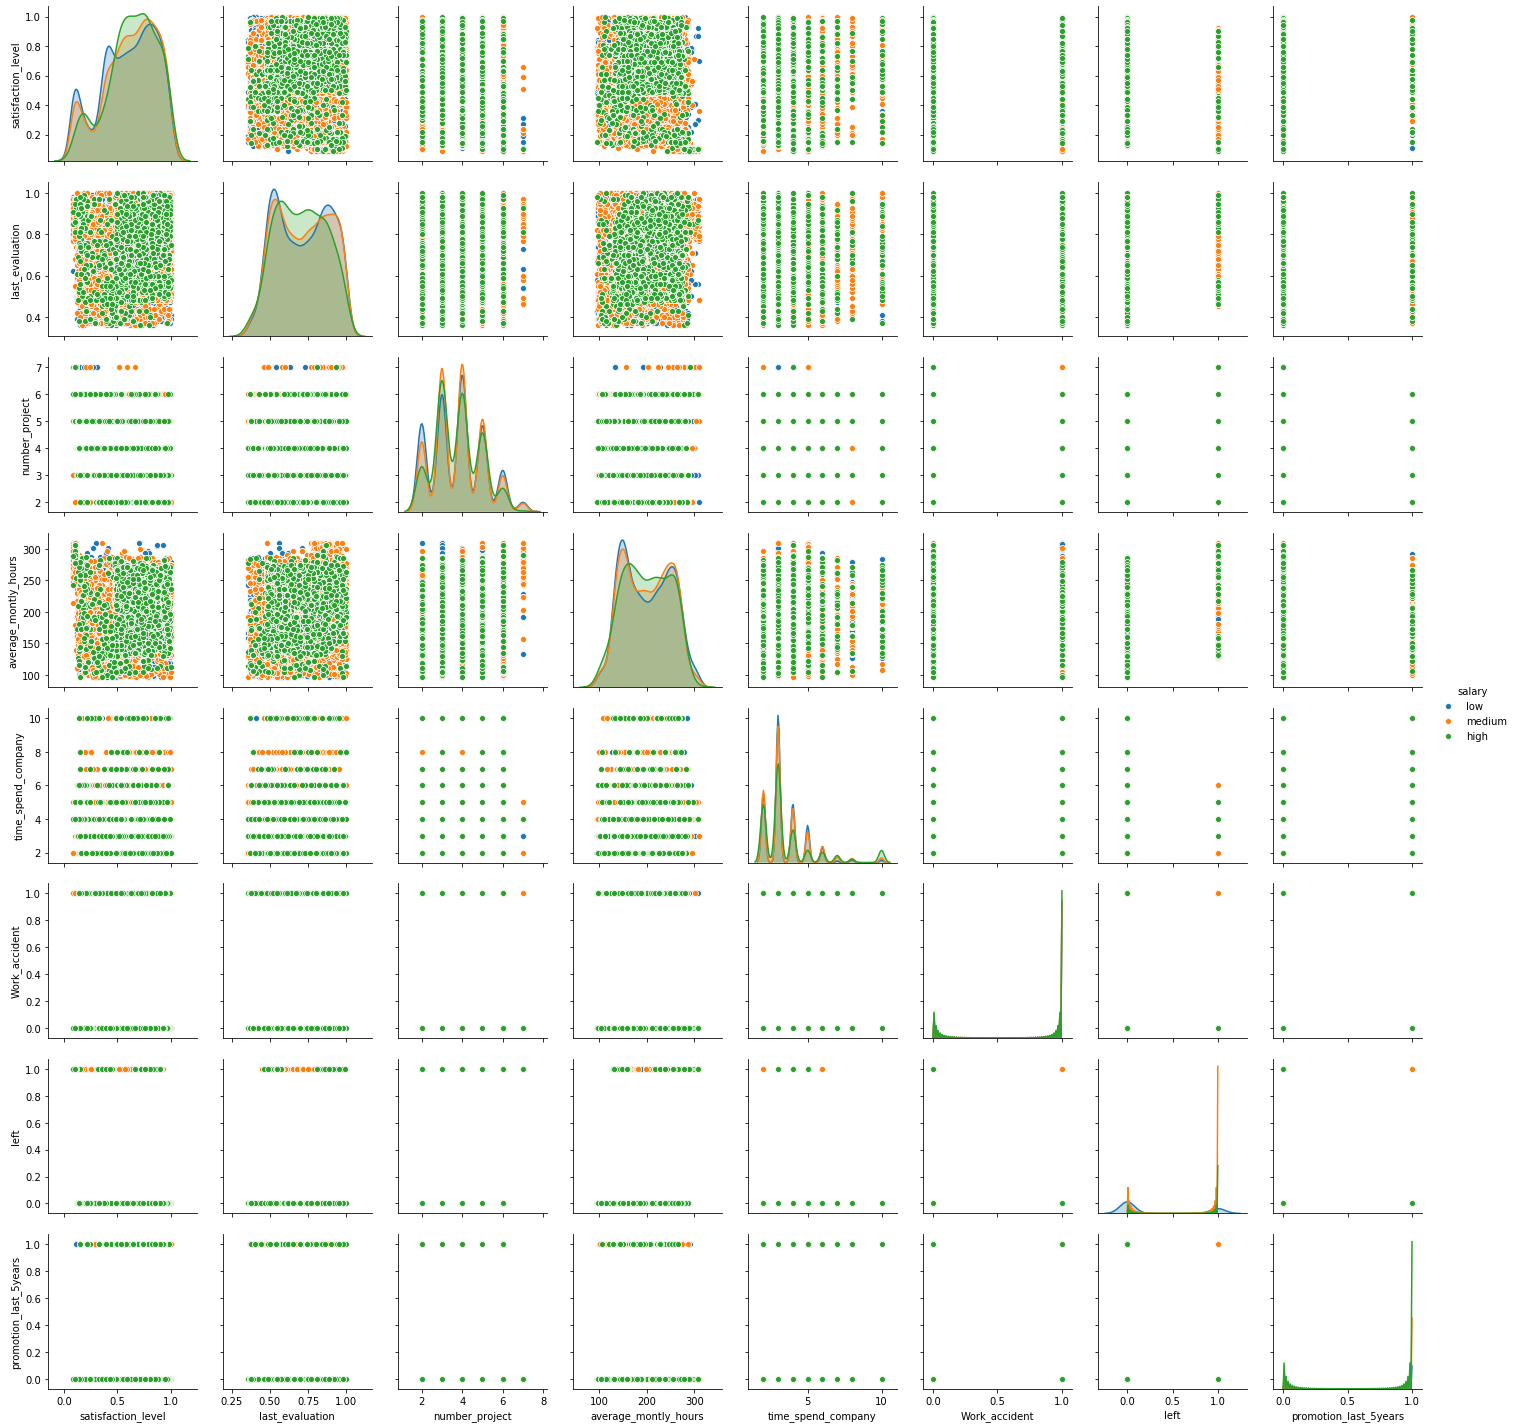

In [7]:
fig = sns.pairplot(data=hr, hue='salary')
plt.show()

<Figure size 800x640 with 0 Axes>

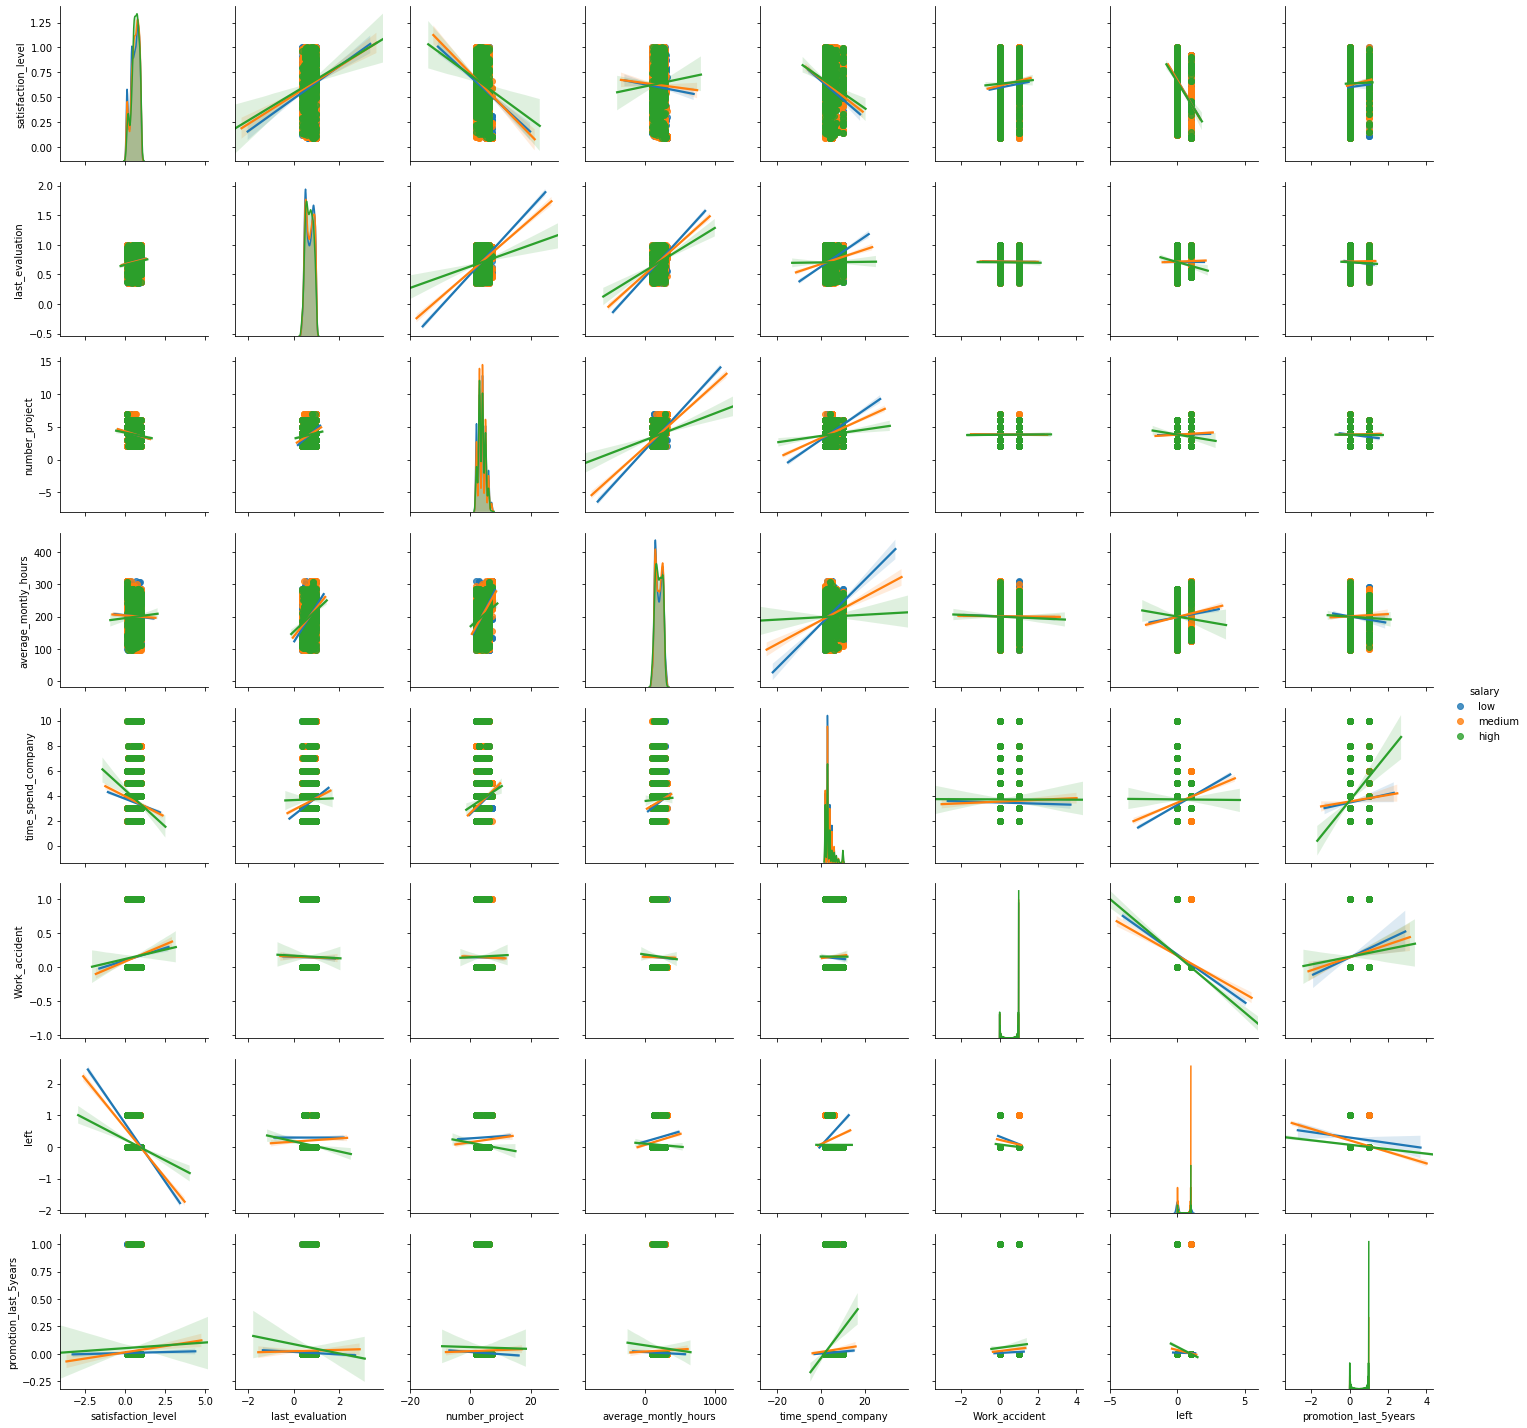

In [8]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(hr, kind="reg", hue="salary")
plt.show()

График текучести кадров по отделам

Text(0, 0.5, 'Частота текучести кадров')

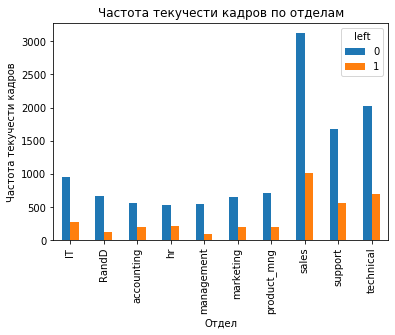

In [30]:
%matplotlib inline 
import matplotlib.pyplot as plt 
pd.crosstab(hr.sales,hr.left).plot(kind='bar') 
plt.title('Частота текучести кадров по отделам') 
plt.xlabel('Отдел') 
plt.ylabel('Частота текучести кадров') 
#plt.savefig('sales_bar_chart')

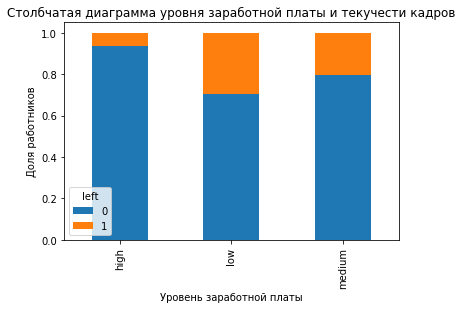

In [20]:
table=pd.crosstab(hr.salary, hr.left) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Столбчатая диаграмма уровня заработной платы и текучести кадров') 
plt.xlabel('Уровень заработной платы') 
plt.ylabel('Доля работников') 
#plt.savefig('salary_bar_chart') 

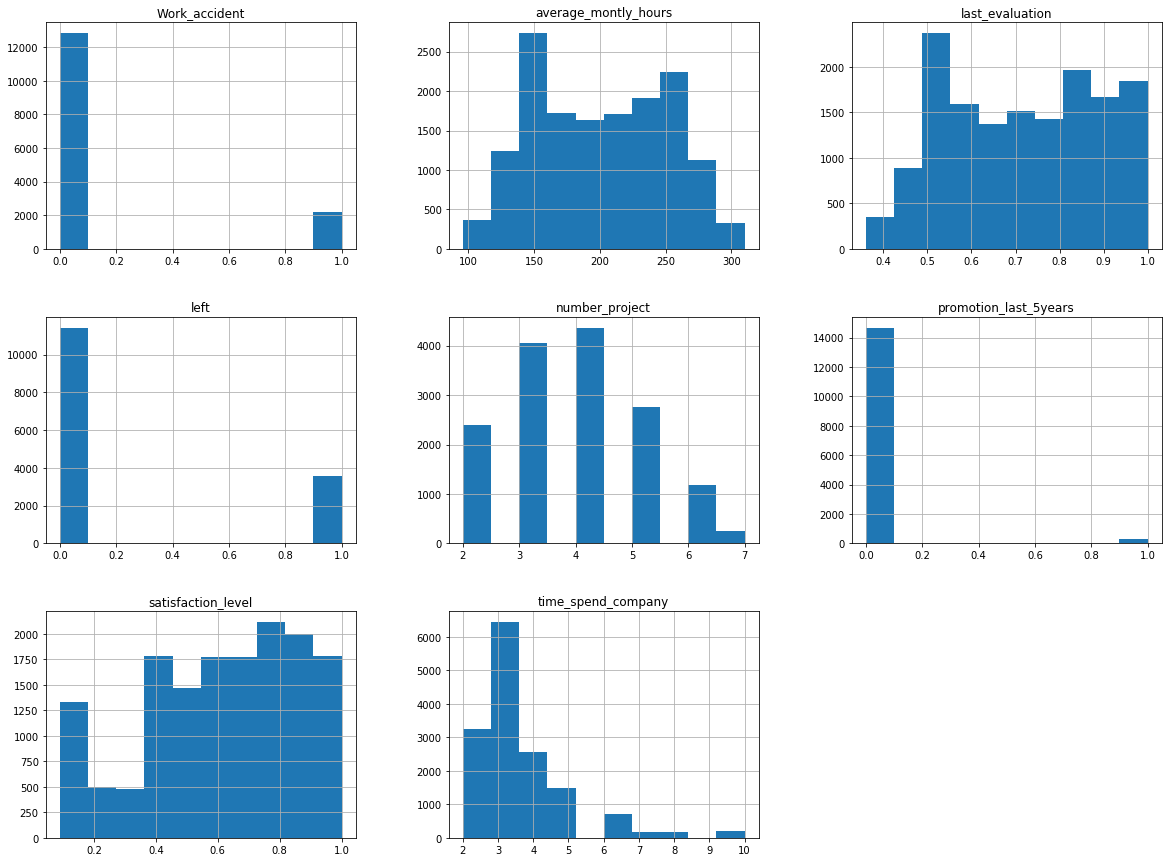

In [32]:
num_bins = 10 

hr.hist(bins=num_bins, figsize=(20,15)) 
plt.savefig("hr_histogram_plots") 
plt.show()

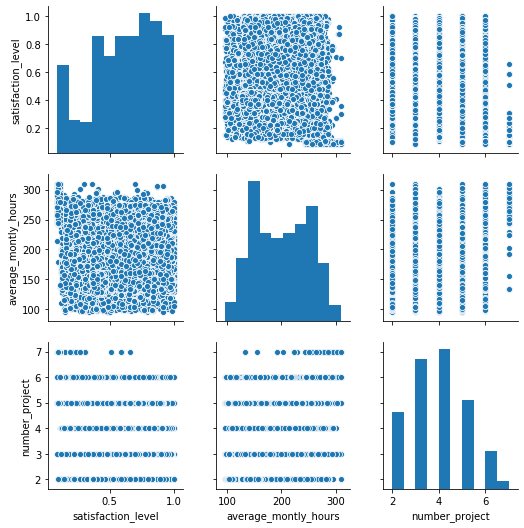

In [34]:
sns_plot = sns.pairplot(
    hr[['satisfaction_level', 'average_montly_hours', 'number_project']])
sns_plot

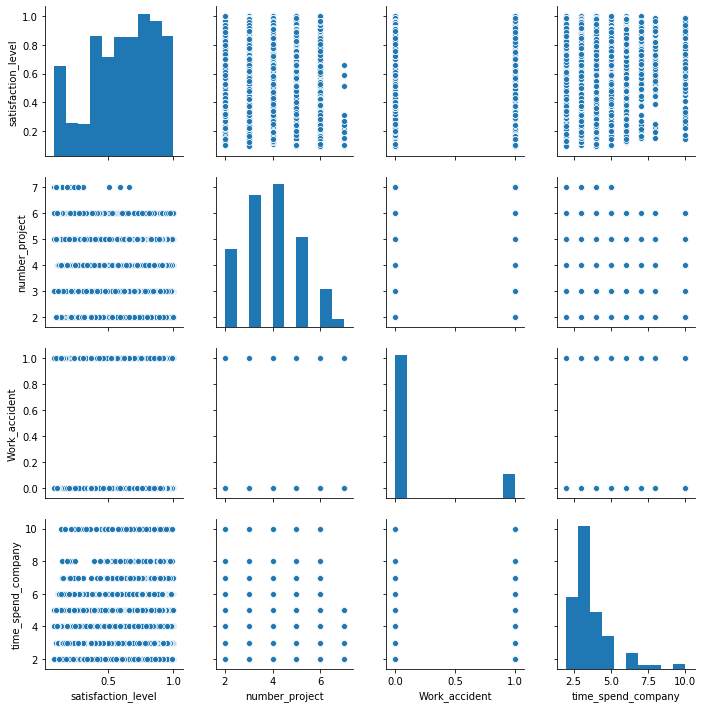

In [35]:
sns_plot = sns.pairplot(
    hr[['satisfaction_level', 'number_project', 'Work_accident', 'time_spend_company']])
sns_plot

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Среднее количество часов в месяц и-и-и-и-и количество выполненных проектов.

In [21]:
stats.ttest_ind(hr.average_montly_hours, hr.number_project)

Ttest_indResult(statistic=483.54229603425085, pvalue=0.0)

p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

Уровень удовлетворённости и-и-и-и-и количество выполненных проектов.

In [22]:
stats.ttest_ind(hr.satisfaction_level, hr.number_project)

Ttest_indResult(statistic=-310.721972689063, pvalue=0.0)

p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

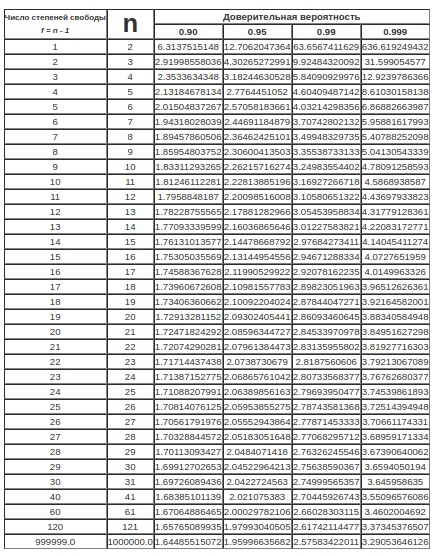

In [93]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

**В пукнте 10 при проверке гипотез, также использую ttest.**

# 6. Рассчитать сколько работников работает в каждом департаменте.

Тот, кто уволился, в каком департаменте работал:

In [81]:
hr[hr['left']==1]['sales'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

Те, кто работает:

In [37]:
hr[hr['left']==0]['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

In [ ]:
Кто так или иначе связан был с работой. То есть суммарно:

In [38]:
hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

# 7. Показать распределение сотрудников по зарплатам.

Среди уволенных:

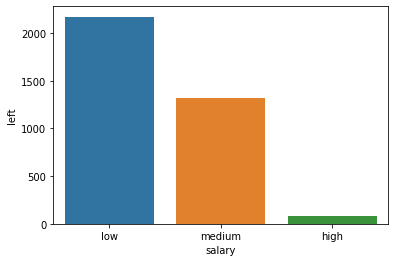

In [91]:
hr1 = hr[hr['left']==1]
sns.barplot(x='salary', y='left', data=hr1, estimator=len)

Среди оставшихся работать:

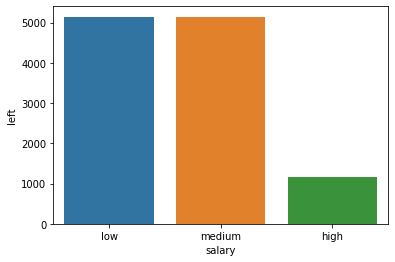

In [92]:
hr0 = hr[hr['left']==0]
sns.barplot(x='salary', y='left', data=hr0, estimator=len)

Суммарно по всем сотрудникам (уволились или работают):

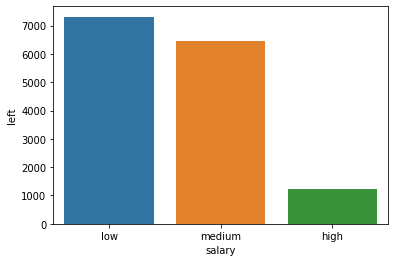

In [39]:
sns.barplot(x='salary', y='left', data=hr, estimator=len)

Text(0, 0.5, 'Доля работников')

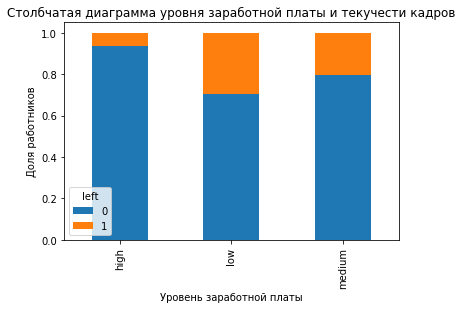

In [42]:
table=pd.crosstab(hr.salary, hr.left) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Столбчатая диаграмма уровня заработной платы и текучести кадров') 
plt.xlabel('Уровень заработной платы') 
plt.ylabel('Доля работников') 
#plt.savefig('salary_bar_chart')  

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

Text(0, 0.5, 'Доля работников')

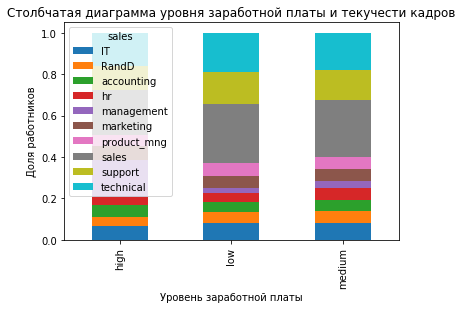

In [43]:
table=pd.crosstab(hr.salary, hr.sales) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Столбчатая диаграмма уровня заработной платы и текучести кадров') 
plt.xlabel('Уровень заработной платы') 
plt.ylabel('Доля работников') 
#plt.savefig('salary_bar_chart') 

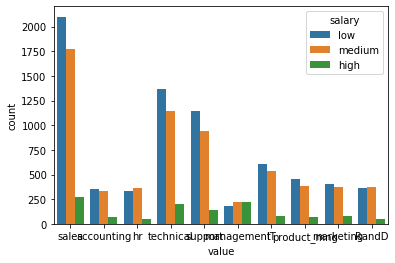

In [44]:
sns.countplot(x="value", hue="salary", data=pd.melt(hr, col_level=0, id_vars=['salary'], value_vars=['sales']))

# 9. Сколько сотрудников покинули компанию.

In [36]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [20]:
hr['left'].value_counts()[1]

3571

**Ушло 3571 сотрудников**, а осталось 11428 сотрудников.

# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [47]:
 hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Выше представлены средние значения по категориям для уволившихся и оставшихся сотрудников.
Можно заметить, что:
* Средний уровень удовлетворённости (satisfaction_level) у уволившихся сотрундиков меньше, чем у тех кто остался в компании.
* Уволившиеся сотрудники больше работали за месяц (average_montly_hours).
* Несчастные случаи на работе (Work_accident) скорей оставляют сотрудников в компании.
* Сотрудники не получившие повышение за последние пять лет (~promotion_last_5years) с большей вероятностью покинут компанию.

In [66]:
left = hr[hr['left'] == 1]
not_left = hr[hr['left'] != 1]

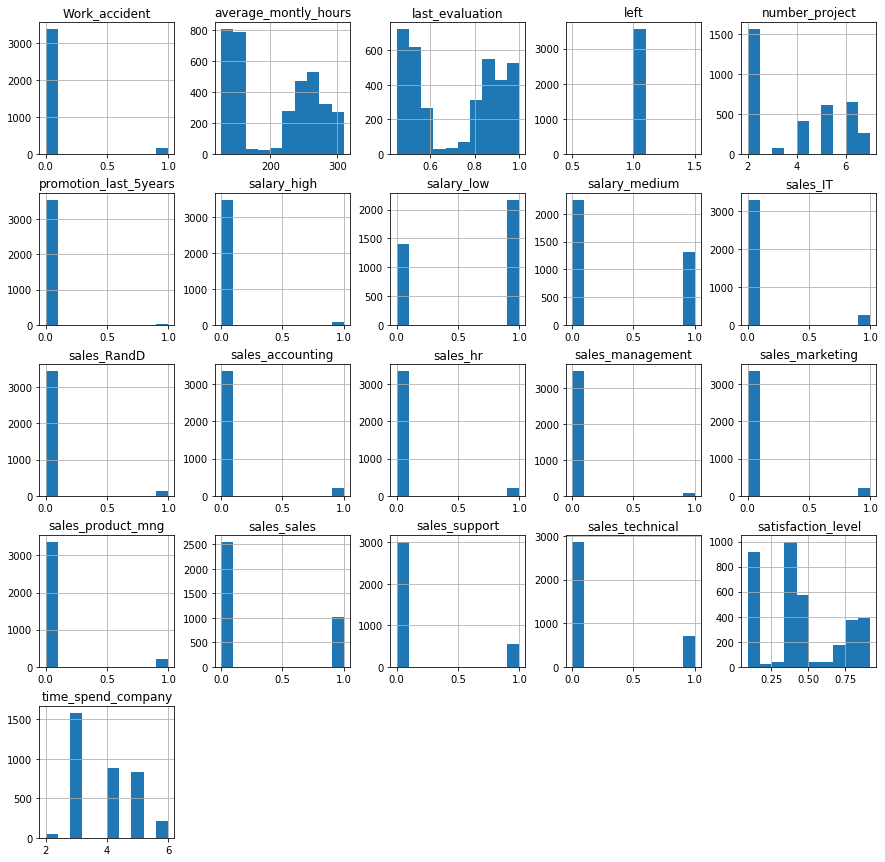

In [67]:
left.hist(figsize=(15,15))
plt.show()

In [73]:
import researchpy as rp
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(hr.groupby('Work_accident')['left'])

,N,Mean,SD,SE,95% Conf.,Interval
Work_accident,,,,,,
0,12830,0.265160,0.441435,0.003897,0.257521,0.272799
1,2169,0.077916,0.268101,0.005757,0.066630,0.089202


In [74]:
rp.summary_cont(hr.groupby('number_project')['left'])

,N,Mean,SD,SE,95% Conf.,Interval
number_project,,,,,,
2,2388,0.656198,0.475076,0.009722,0.637139,0.675256
3,4055,0.017756,0.132079,0.002074,0.013690,0.021822
4,4365,0.093700,0.291444,0.004411,0.085053,0.102347
5,2761,0.221659,0.415438,0.007906,0.206160,0.237158
6,1174,0.557922,0.496845,0.014501,0.529488,0.586355
7,256,1.000000,0.000000,0.000000,1.000000,1.000000


In [79]:
descriptives, results = rp.ttest(left.average_montly_hours, left.satisfaction_level)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,average_montly_hours,3571.0,207.419210,61.202825,1.024181,205.411172,209.427248
1,satisfaction_level,3571.0,0.440098,0.263933,0.004417,0.431438,0.448758
2,combined,7142.0,103.929654,112.179559,1.327406,101.327545,106.531763


In [84]:
results

,Independent t-test,results
0,Difference (time_spend_company - time_spend_co...,0.4965
1,Degrees of freedom =,14997.0000
2,t =,17.9242
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.3436
7,Hedge's g =,0.3436
8,Glass's delta =,0.5078
9,r =,0.1448


**Гипотеза: Сотрудники покидают работу из-за несчастных случаев на работе.**

In [85]:
left_Wa = hr[hr['left'] == 1].Work_accident
not_left_Wa = hr[hr['left'] != 1].Work_accident

In [71]:
descriptives, results = rp.ttest(left_Wa, not_left_Wa)
print(descriptives)
print('_____________________________')
print(results)

        Variable        N      Mean        SD        SE  95% Conf.  Interval
0  Work_accident   3571.0  0.047326  0.212364  0.003554   0.040358  0.054293
1  Work_accident  11428.0  0.175009  0.379991  0.003555   0.168041  0.181976
2       combined  14999.0  0.144610  0.351719  0.002872   0.138980  0.150239
_____________________________
                              Independent t-test     results
0  Difference (Work_accident - Work_accident) =      -0.1277
1                          Degrees of freedom =   14997.0000
2                                           t =     -19.1658
3                       Two side test p value =       0.0000
4                      Difference < 0 p value =       0.0000
5                      Difference > 0 p value =       1.0000
6                                   Cohen's d =      -0.3674
7                                   Hedge's g =      -0.3674
8                               Glass's delta =      -0.6012
9                                           r =     

Difference > 0 p value = 1.0000 Есть различие, влияние. Да, покидают из-за несчастных случаев.

**Гипотеза: Сотрудники покидают работу из-за времени работы в компании в годах.**

In [81]:
left_tsc = hr[hr['left'] == 1].time_spend_company
not_left_tsc = hr[hr['left'] != 1].time_spend_company

In [82]:
descriptives, results = rp.ttest(left_tsc, not_left_tsc)
print(descriptives)
print('_____________________________')
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  time_spend_company   3571.0  3.876505  0.977698  0.016361   3.844427   
1  time_spend_company  11428.0  3.380032  1.562348  0.014615   3.351384   
2            combined  14999.0  3.498233  1.460136  0.011922   3.474864   

   Interval  
0  3.908583  
1  3.408679  
2  3.521602  
_____________________________
                                  Independent t-test     results
0  Difference (time_spend_company - time_spend_co...      0.4965
1                              Degrees of freedom =   14997.0000
2                                               t =      17.9242
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       1.0000
5                          Difference > 0 p value =       0.0000
6                                       Cohen's d =       0.3436
7                                       Hedge's g =       0.3436
8                           

Difference > 0 p value < 0.05 Нет различий, влияния. Покидают сотрудники компанию по другим причинам.

В наборе данных есть две категориальные переменные (отдел, зарплата).
Преобразуем их в фиктивные переменные.

In [48]:
cat_vars=['sales','salary'] 
for var in cat_vars: 
    cat_list='var' + '_' + var 
    cat_list = pd.get_dummies(hr[var], prefix=var) 
    hr1=hr.join(cat_list) 
    hr=hr1 

Создали новую переменную на базе прежних, следовательно нужно удалить переменные-прообразы. Имена столбцов после создания фиктивных переменных:

In [49]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True) 
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management',
       'sales_marketing', 'sales_product_mng', 'sales_sales',
       'sales_support', 'sales_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

'left' - конечная переменная, все остальные - предикторы для прогнозирования.

In [50]:
hr_vars=hr.columns.values.tolist() 
y=['left'] 
X=[i for i in hr_vars if i not in y] 

**Отбор признаков с помощью RFE**

Recursive Feature Elimination (RFE) работает через рекурсивное удаление переменных и построение модели на тех переменных, которые остаются.
Отберём 10 столбцов, наиболее значимых для прогнозирования.

In [51]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 
 
model = LogisticRegression() 
 
rfe = RFE(model, 10) 
rfe = rfe.fit(hr[X], hr[y]) 
print(rfe.support_) 
print(rfe.ranking_) 

C:\Users\George\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\George\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[ True  True False False  True  True  True False  True False  True  True
 False False False False False  True  True False]
[ 1  1  3 11  1  1  1  9  1  6  1  1  7 10  8  5  4  1  1  2]


In [52]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
 'sales_RandD', 'sales_hr', 'sales_management', 'salary_high', 'salary_low'] 
X=hr[cols] 
y=hr['left'] 

**Logistic Regression Model**

In [53]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
from sklearn.metrics import accuracy_score 
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test)))) 

Logistic regression accuracy: 0.771


Точность модели: 0.771

**Random Forest**

In [55]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.978


Точность модели: 0.978

**Support Vector Machine**

In [57]:
from sklearn.svm import SVC 
svc = SVC() 
svc.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test)))) 

Support vector machine accuracy: 0.907


Точность модели: 0.907

**Модель Random Forest точнее других моделей.**

**Cross Validation (перекрестная проверка)**

 Используем 10-кратную кросс-валидацию для обучения нашей модели Random Forest.

In [61]:
from sklearn import model_selection 
from sklearn.model_selection import cross_val_score 
kfold = model_selection.KFold(n_splits=10, random_state=7) 
modelCV = RandomForestClassifier() 
scoring = 'accuracy' 
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring) 
print("10-fold cross validation average accuracy: %.3f" % (results.mean())) 

C:\Users\George\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.982


Средняя точность 10-кратной кросс-валидации 0.982

**Precision and recall**

In [ ]:
Визуализируем прогноз и оценим точность.

**Random Forest**

In [40]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, rf.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3462
           1       0.95      0.94      0.95      1038

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



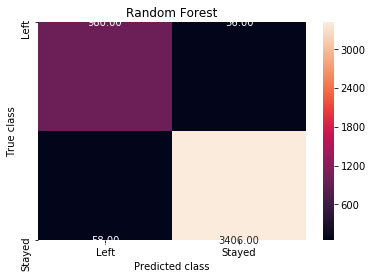

In [41]:
y_pred = rf.predict(X_test) 
from sklearn.metrics import confusion_matrix 
import seaborn as sns 
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0]) 
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.title('Random Forest') 
plt.savefig('random_forest') 

**Logistic Regression**

In [42]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



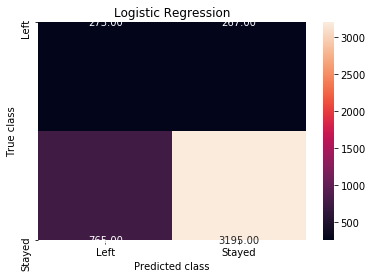

In [43]:
logreg_y_pred = logreg.predict(X_test) 
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0]) 
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.title('Logistic Regression') 
plt.savefig('logistic_regression') 

**Support Vector Machine**

In [44]:
 print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3462
           1       0.77      0.86      0.81      1038

    accuracy                           0.91      4500
   macro avg       0.86      0.89      0.88      4500
weighted avg       0.91      0.91      0.91      4500



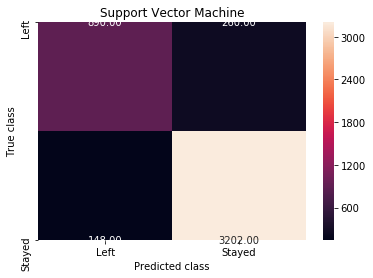

In [45]:
svc_y_pred = svc.predict(X_test) 
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0]) 
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.title('Support Vector Machine') 
plt.savefig('support_vector_machine')

recall - классификатор предугадывает уход сотрудника; precision - классификатор предсказывает уход сотрудника и он уходит.

Точность лучше у Random Forest.

# Кривая ROC

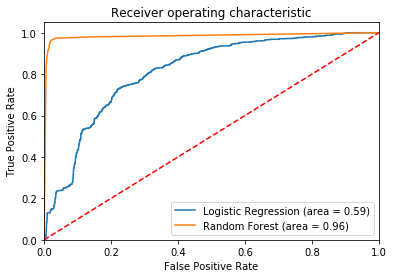

In [46]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1]) 
 
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test)) 
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1]) 
 
plt.figure() 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) 
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('ROC') 
plt.show() 

In [50]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
 'sales_RandD', 'sales_hr', 'sales_management', 'salary_high', 'salary_low']) 
importance = rf.feature_importances_ 
feature_indexes_by_importance = importance.argsort() 
for index in feature_indexes_by_importance: 
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

sales_management-0.23%
promotion_last_5years-0.26%
sales_RandD-0.35%
sales_hr-0.36%
salary_high-0.96%
Work_accident-1.33%
salary_low-1.43%
last_evaluation-19.26%
time_spend_company-29.44%
satisfaction_level-46.39%


И здесь победитель Random Forest (оранжевая линия), он дальше от пунктирной линии и ближе к верхнему левому углу.

# Feature Importance (значимость признаков) для Random Forest Model

In [64]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
 'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low']) 
importance = rf.feature_importances_ 
feature_indexes_by_importance = importance.argsort() 
for index in feature_indexes_by_importance: 
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.24%
promotion_last_5years-0.24%
department_RandD-0.29%
department_hr-0.30%
salary_high-0.67%
salary_low-1.16%
Work_accident-1.45%
last_evaluation-18.20%
time_spend_company-26.71%
satisfaction_level-50.74%


Выше представлены признаки, которые сильней влияют на уход сотрудников из компании.

Было ли у сотрудника повышение за последние 5 лет. Уровень заработной платы. Несчастные случаи на работе. это всё признаки, которые способствуют уходу сотрудников из компании.